In [29]:
import pandas
import numpy
from matplotlib import pyplot as plt
from toposample.data.data_structures import ConditionCollection

%matplotlib inline

gini_thresh = 0.25

fn = "/home/reimann/Documents/data/THNCX/M4_validation/compared_densities.pkl"
data = pandas.read_pickle(fn)
cc = ConditionCollection.from_pandas(data)

layers = sorted(cc.labels_of("Layer"))
mtypes = sorted(cc.labels_of("Mtype"))
regions = cc.labels_of("Region")

IOPub message rate exceeded.                                                   
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.                                                   
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.                                                   
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub

In [80]:
def distribution_gini(vals):
    vals = [_x for _x in vals if not numpy.isnan(_x)]
    if len(vals) == 0:
        return numpy.NaN
    vals = numpy.cumsum(sorted(vals)) / numpy.sum(vals)
    return (0.5 - numpy.trapz(vals, dx=1./len(vals))) / 0.5

def filter_layer(layers, mtypes, regions, values):
    for l, m, r, v in zip(layers, mtypes, regions, values):
        if "_" in m:
            splt = m.split("_")[0]
            if l not in splt:
                v = numpy.NaN
        yield v, {"Layer": l, "Mtype": m, "Region": r}

def ordered_stack(x, y):
    idxx = numpy.argsort(x)
    return [y[i] for i in idxx]

def outliers(x, y):
    y = numpy.array(y)
    mn = numpy.nanmean(y)
    rel_y = (y - mn) / (y + mn)
    return [(_x, _y) for _x, _y in zip(x, rel_y) if numpy.abs(_y) > 0.333333]  # Corresponds to less than half or more than twice the mean

cc_fltr = cc.transform(["Layer", "Mtype", "Region"], func=filter_layer, xy=True)
dens_vecs = cc_fltr.pool(["Region"], func=ordered_stack, xy=True)
dens_outliers = cc_fltr.pool(["Region"], func=outliers, xy=True)
gini = dens_vecs.map(distribution_gini)
gini_img = gini.pool(["Layer"],
                          func=ordered_stack,
                          xy=True).pool(["Mtype"],
                                        func=ordered_stack,
                                        xy=True).map(numpy.array)


IOPub message rate exceeded.                                                   
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.                                                   
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.                                                   
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub

Text(0.5, 1.0, '(normalized) gini coefficient of densities over regions')

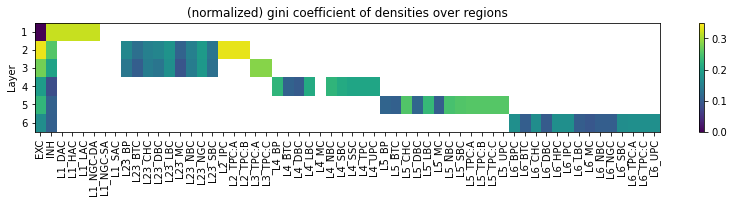

In [81]:
ax = plt.figure(figsize=(14, 2)).gca()
img = ax.imshow(gini_img.get2().transpose(), aspect='auto')
img.set_clim([0, 0.35])
plt.colorbar(img)

ax.set_xticks(range(len(mtypes)))
ax.set_xticklabels(mtypes, rotation='vertical')
ax.set_yticks(range(len(layers)))
ax.set_yticklabels(layers)
ax.set_ylabel("Layer")
ax.set_title("(normalized) gini coefficient of densities over regions")

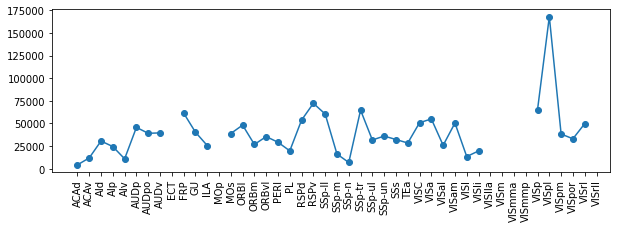

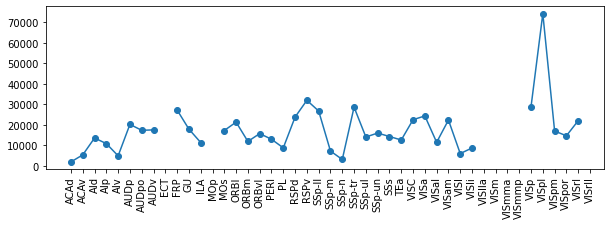

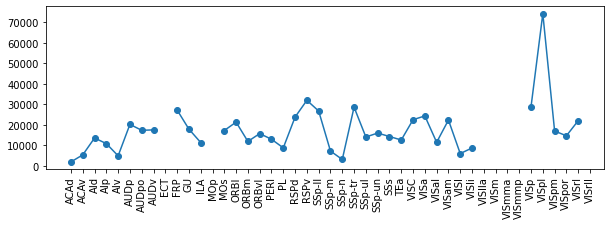

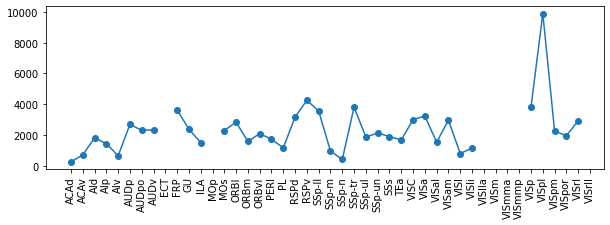

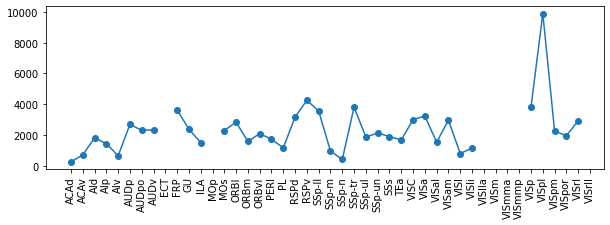

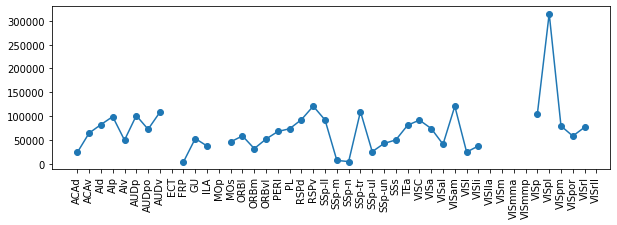

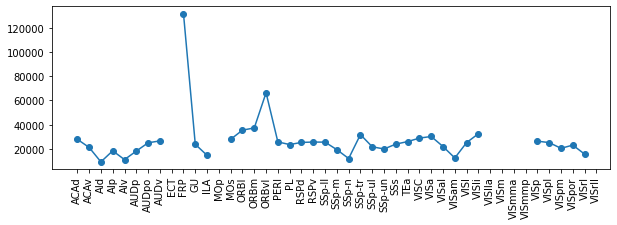

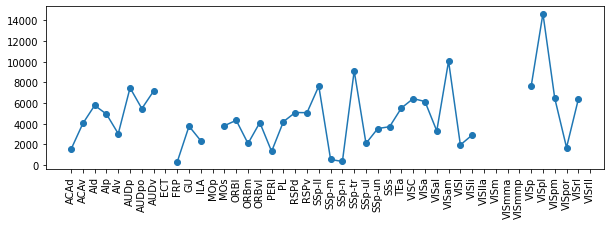

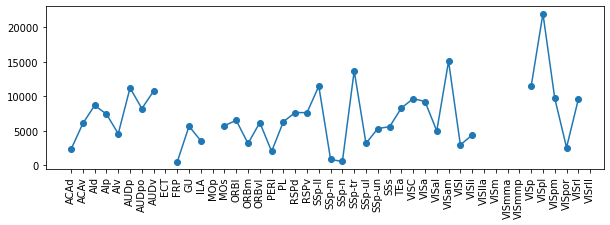

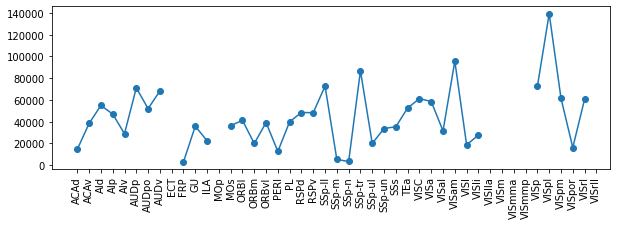

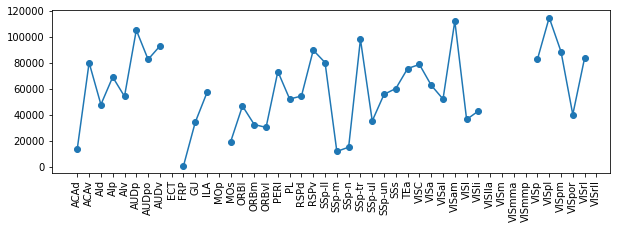

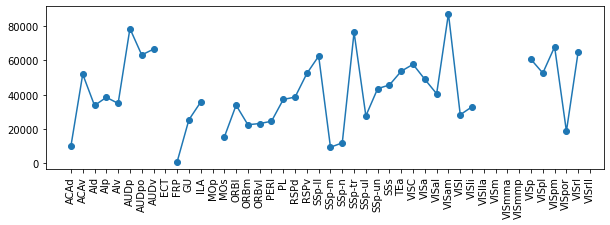

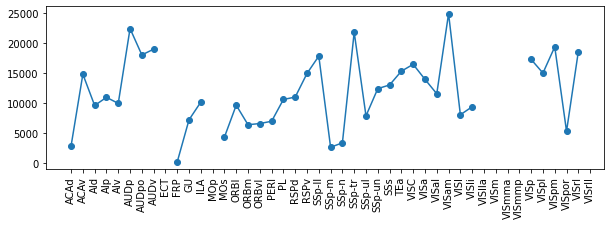

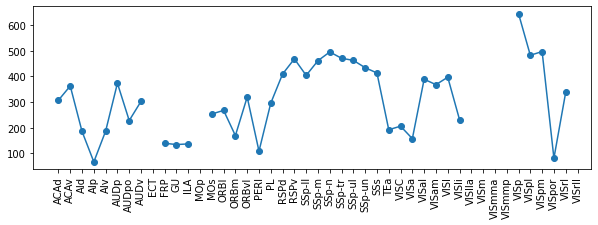

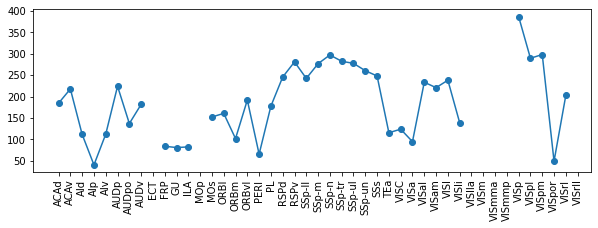

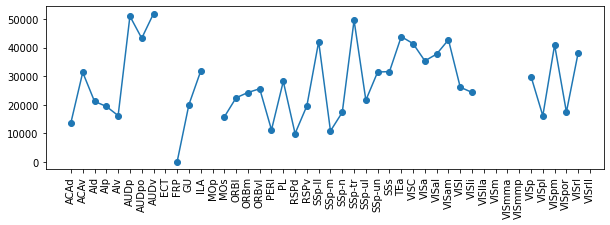

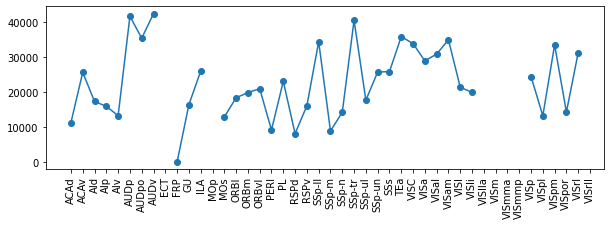

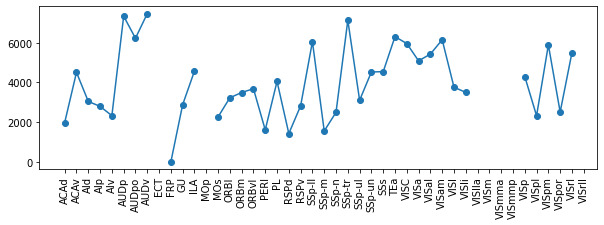

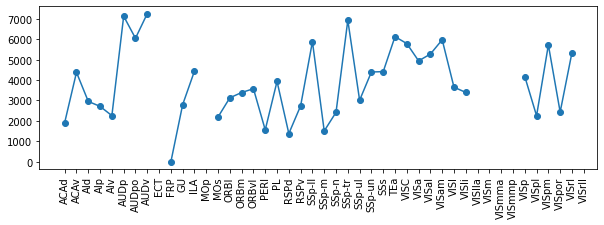

In [82]:
exceeds = [x.cond for x in gini.contents if x.res > gini_thresh]

for conds in exceeds:
    ax = plt.figure(figsize=(10, 3)).gca()
    D = dens_vecs.get2(**conds)
    #D = 100 * numpy.array(D) / numpy.nansum(D)
    ax.plot(D, marker='o', label=str(conds))
#plt.legend()
    ax.set_xticks(range(len(regions)))
    _ = ax.set_xticklabels(regions, rotation="vertical")

In [83]:
for x in dens_outliers.contents:
    if len(x.res) > 0:
        print("layer {0}, mtype {1}:\n".format(x.cond["Layer"], x.cond["Mtype"]))
        for entry in x.res:
            print("\tregion {0}: {1}".format(*entry))
        

layer 1, mtype EXC:

	region ACAd: 2.2824727974389867
	region ACAv: -0.695528667545234
	region AId: 1.4397581000043944
	region AIp: 1.3418931447090618
	region AIv: 1.5490928305638636
	region AUDp: -1.0644585244609919
	region AUDpo: 1.660325841247917
	region AUDv: 2.9657368852534307
	region GU: -5.500319621291441
	region ILA: 1.4781565006865514
	region ORBl: 2.008825315052789
	region ORBm: 0.7845467621893208
	region ORBvl: -0.7382195295694403
	region PERI: 0.842758495958814
	region RSPd: 0.5081765019522945
	region RSPv: 1.2804058045699866
	region SSp-ll: 0.6350162723577504
	region SSp-m: 0.6155263158371936
	region SSp-tr: 0.8587748797168406
	region SSp-ul: 0.7648736980148069
	region SSp-un: 0.7234743192849032
	region SSs: 1.5578114040688196
	region TEa: 0.6390578421637537
	region VISC: 0.8303912883881926
	region VISal: 1.440745657190552
	region VISam: 0.8661695420791041
	region VISl: 0.35959700694521396
	region VISli: -2.871725565424952
	region VISp: 0.700571111969295
	region VISpl: 1.0